# About Dataset
## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
df=pd.read_csv("diabetes.csv")

In [122]:
df.shape

(768, 9)

In [123]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
df.isnull().mean()*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Something is not right with some of the data. Glucose, BloodPressure, SkinThickness, Insulin and BMI can not be 0. 

Replacing all the 0 values in the above mentioned columns with NaN value

In [126]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [127]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [128]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

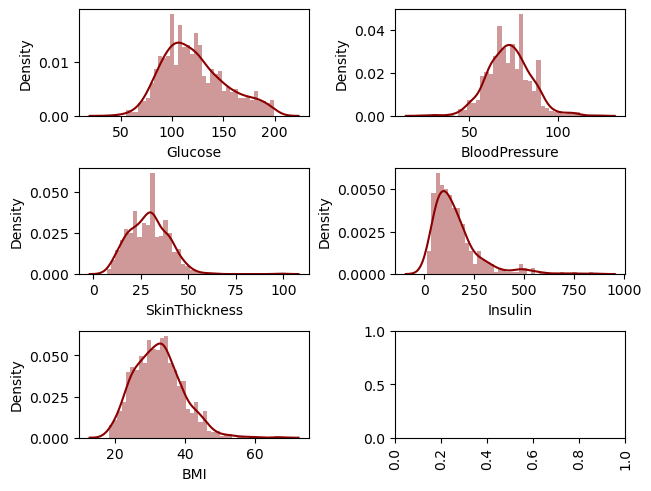

In [129]:
fig, axes = plt.subplots(3, 2,constrained_layout = True)
sns.distplot(df['Glucose'].dropna(),kde=True,color='darkred',bins=40,ax=axes[0,0])
sns.distplot(df['BloodPressure'].dropna(),kde=True,color='darkred',bins=40,ax=axes[0,1])
sns.distplot(df['SkinThickness'].dropna(),kde=True,color='darkred',bins=40,ax=axes[1,0])
sns.distplot(df['Insulin'].dropna(),kde=True,color='darkred',bins=40,ax=axes[1,1])
sns.distplot(df['BMI'].dropna(),kde=True,color='darkred',bins=40,ax=axes[2,0])
plt.xticks(rotation=90)

It is clearly visible from the histograms that the data distribution of concerned columns is skewed. Therefore in order to remove the null values we should use the median.

In [130]:
def median_outcome(value):
    temp=df[df[value].notnull()]
    val=temp[[value,"Outcome"]].groupby(by=["Outcome"])[value].median().reset_index()
    return val


In [131]:
median_outcome("Glucose")

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [132]:
df.loc[(df["Glucose"].isnull()) & (df["Outcome"]==0),"Glucose"]=107.0
df.loc[(df["Glucose"].isnull()) & (df["Outcome"]==1),"Glucose"]=140.0

In [133]:
median_outcome("BloodPressure")

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [134]:
df.loc[(df["BloodPressure"].isnull()) & (df["Outcome"]==0),"BloodPressure"]=70.0
df.loc[(df["BloodPressure"].isnull()) & (df["Outcome"]==1),"BloodPressure"]=74.5

In [135]:
median_outcome("SkinThickness")

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [158]:
df.loc[(df["SkinThickness"].isnull()) & (df["Outcome"]==0),"SkinThickness"]=27.0
df.loc[(df["SkinThickness"].isnull()) & (df["Outcome"]==1),"SkinThickness"]=32.0

In [137]:
median_outcome("Insulin")

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [159]:
df.loc[(df["Insulin"].isnull()) & (df["Outcome"]==0),"Insulin"]=102.5
df.loc[(df["Insulin"].isnull()) & (df["Outcome"]==1),"Insulin"]=169.5

In [139]:
median_outcome("BMI")

,Outcome,BMI
0,0,30.1
1,1,34.3


In [160]:
df.loc[(df["BMI"].isnull()) & (df["Outcome"]==0),"BMI"]=30.1
df.loc[(df["BMI"].isnull()) & (df["Outcome"]==1),"BMI"]=34.3

In [161]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

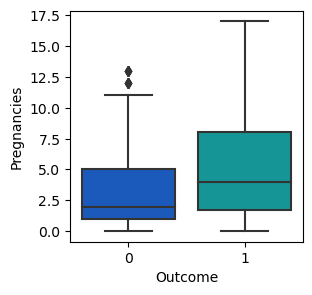

In [162]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

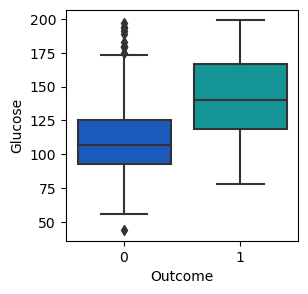

In [163]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='Glucose',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

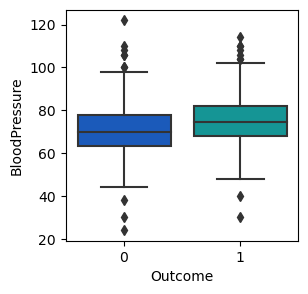

In [164]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='BloodPressure',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

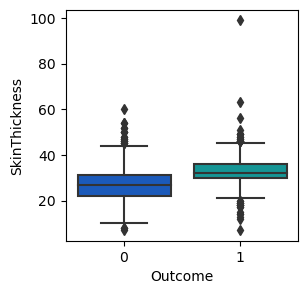

In [165]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='SkinThickness',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

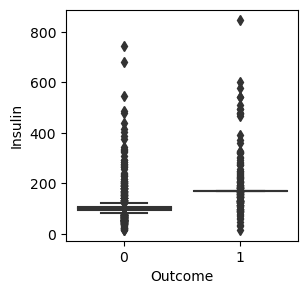

In [166]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='Insulin',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

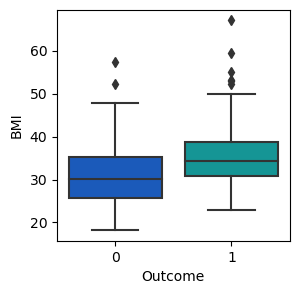

In [167]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='BMI',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

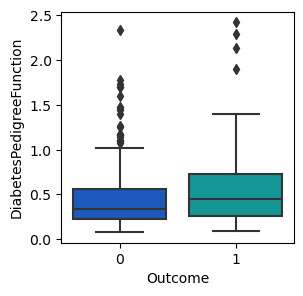

In [168]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,palette='winter')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

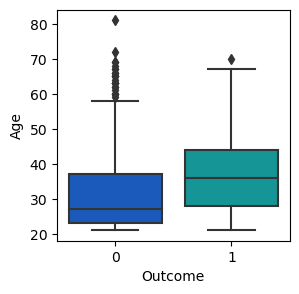

In [175]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='Outcome',y='Age',data=df,palette='winter')

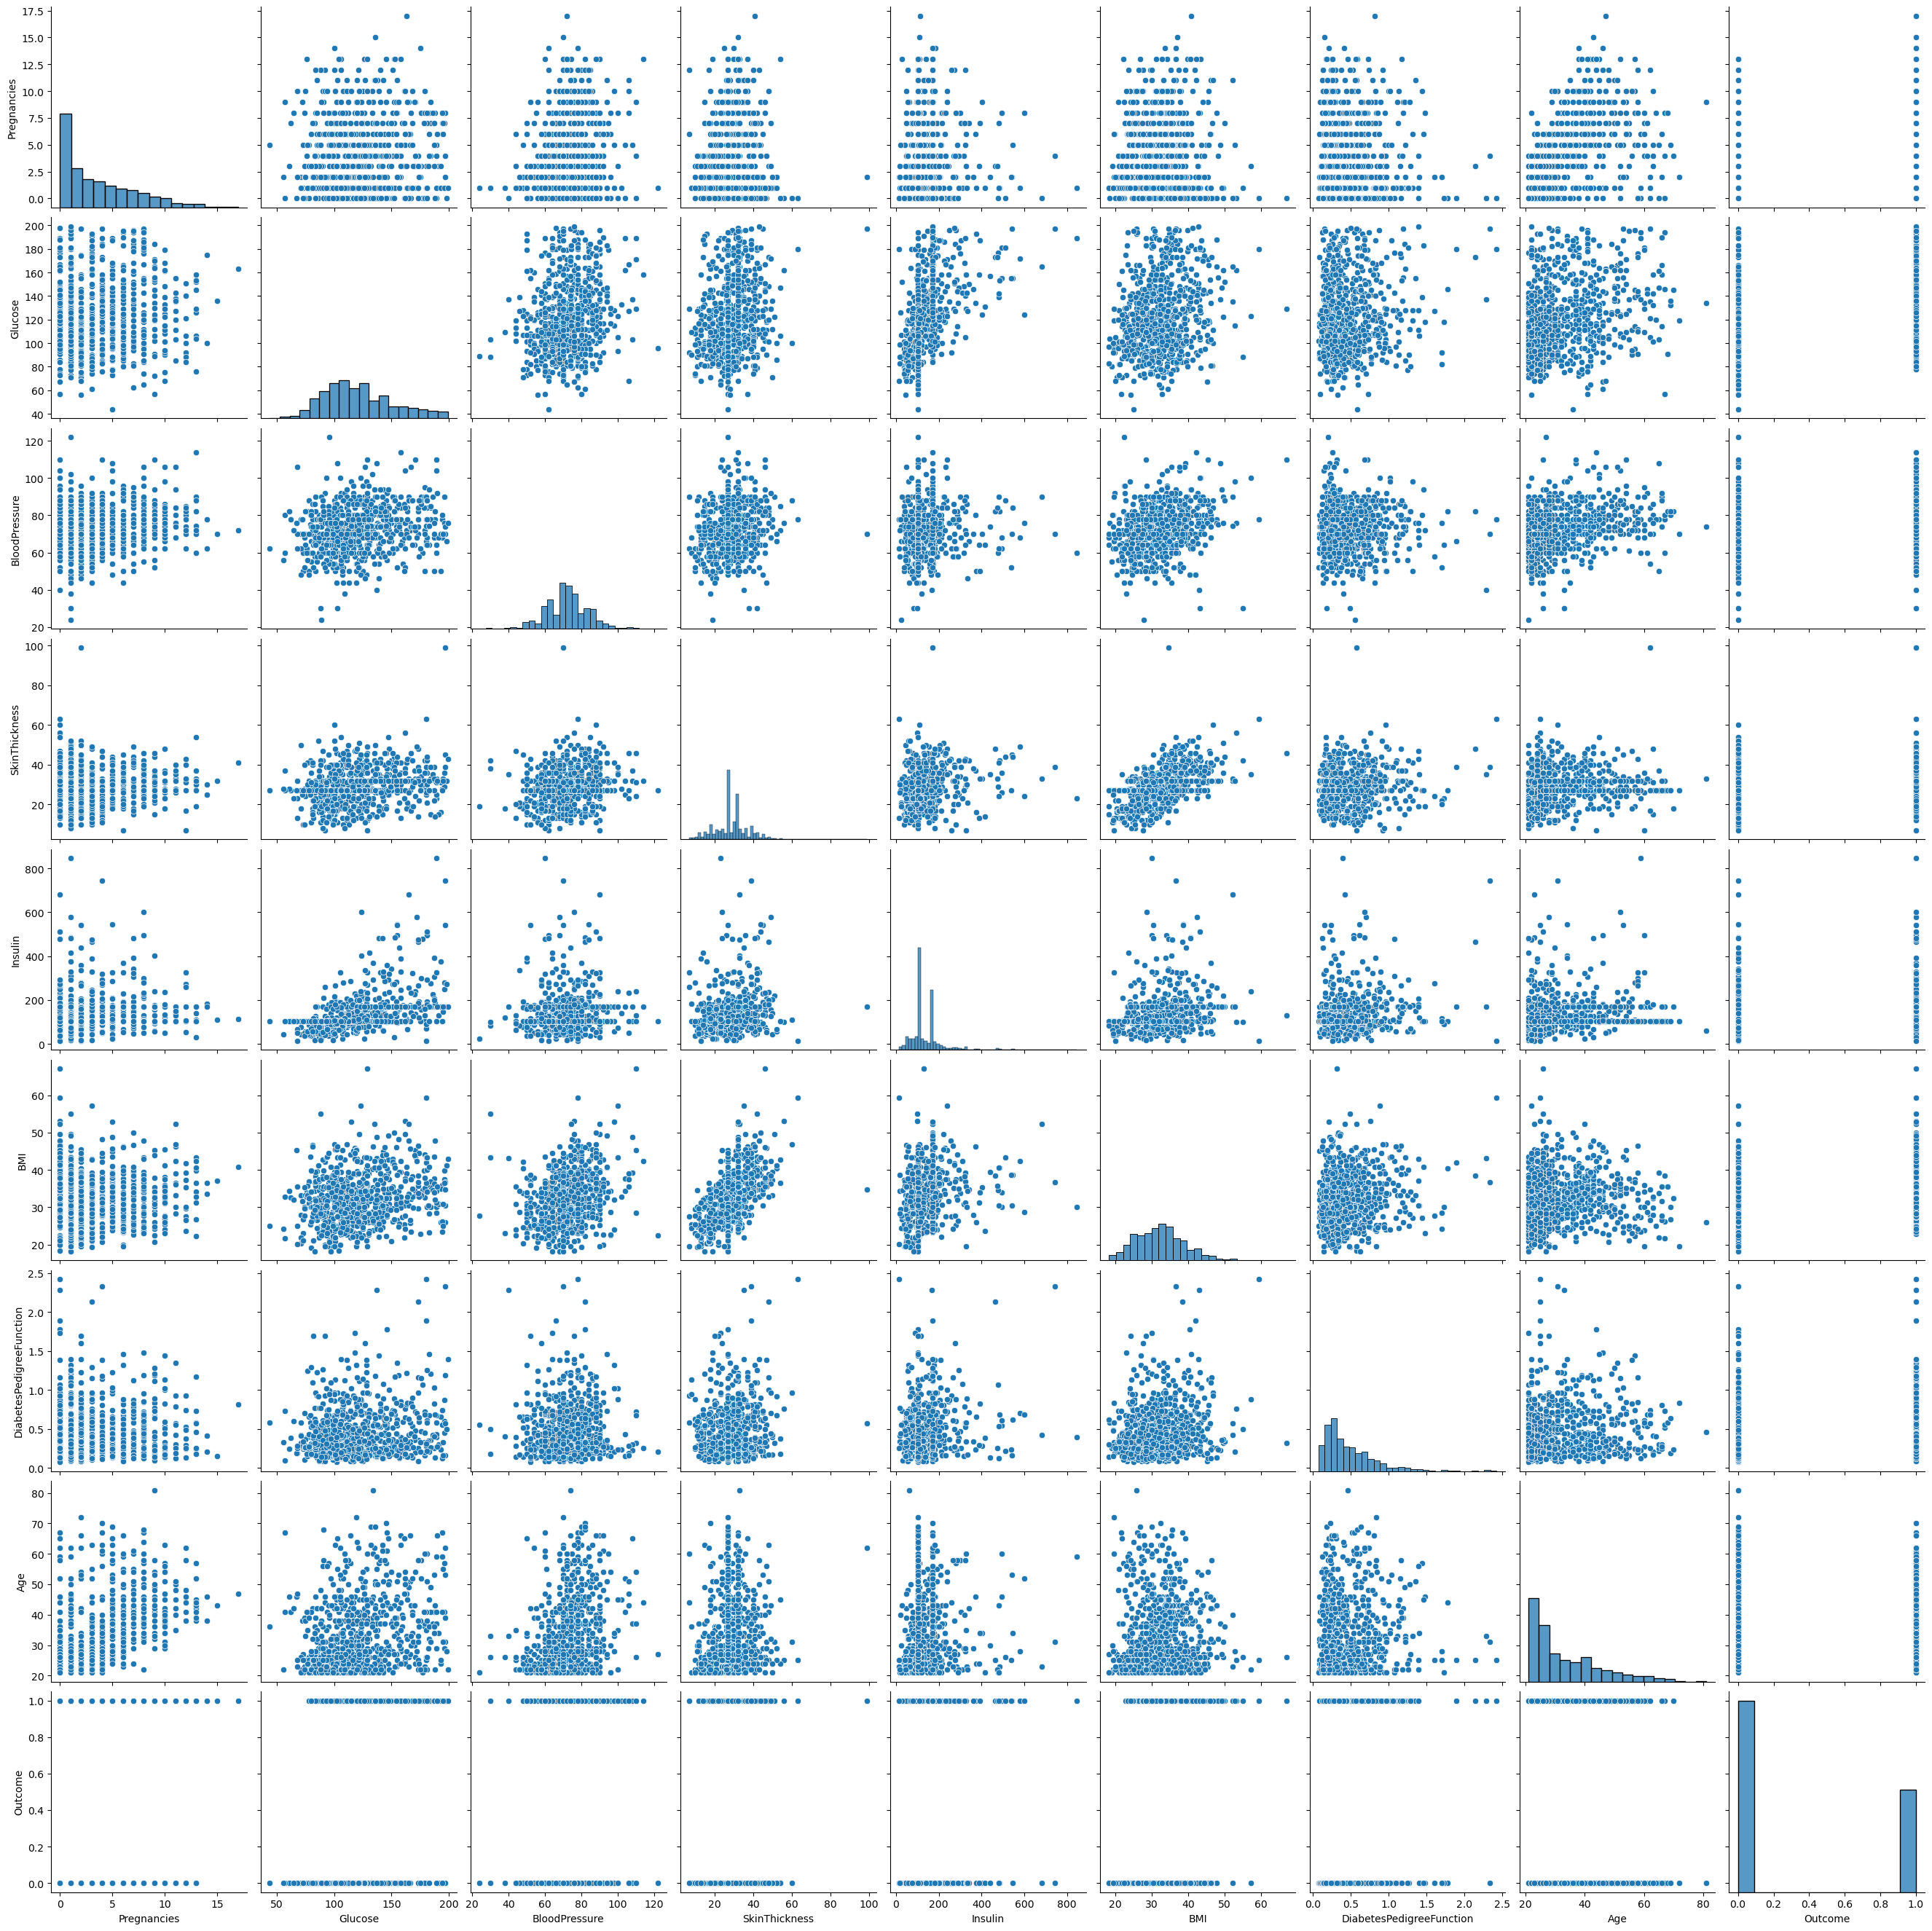

In [170]:
sns.pairplot(df,height=3)

In [171]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, '21'),
  Text(1, 0, '22'),
  Text(2, 0, '23'),
  Text(3, 0, '24'),
  Text(4, 0, '25'),
  Text(5, 0, '26'),
  Text(6, 0, '27'),
  Text(7, 0, '28'),
  Text(8, 0, '29'),
  Text(9, 0, '30'),
  Text(10, 0, '31'),
  Text(11, 0, '32'),
  Text(12, 0, '33'),
  Text(13, 0, '34'),
  Text(14, 0, '35'),
  Text(15, 0, '36'),
  Text(16, 0, '37'),
  Text(17, 0, '38'),
  Text(18, 0, '39'),
  Text(19, 0, '40'),
  Text(20, 0, '41'),
  Text(21, 0, '42'),
  Text(22, 0, '43'),
  Text(23, 0, '44'),
  Text(24, 0, '45'),
  Text(25, 0, '46'),
  Text(26, 0, '47'),
  Text(27, 0, '48'),
  Text(28, 0, '49'),
  Text(29, 0, '50'),
  Text(30, 0, '51'),
  Text(31, 0, '52'),
  Text(32, 0, '53'),
  Text(33, 0, '54'),
  Text(34, 0, '55'),
  Text(35, 0, '56'),
  Text(36, 0

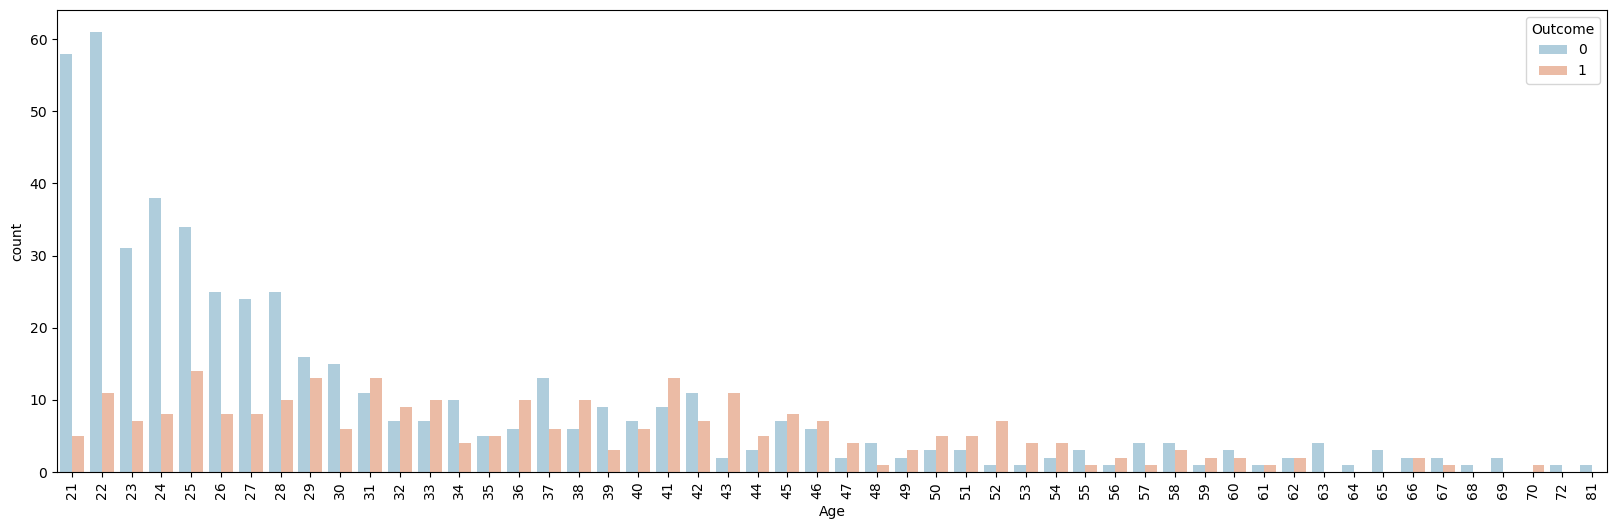

In [172]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x='Age',data=df,hue="Outcome",palette='RdBu_r', ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '17')])

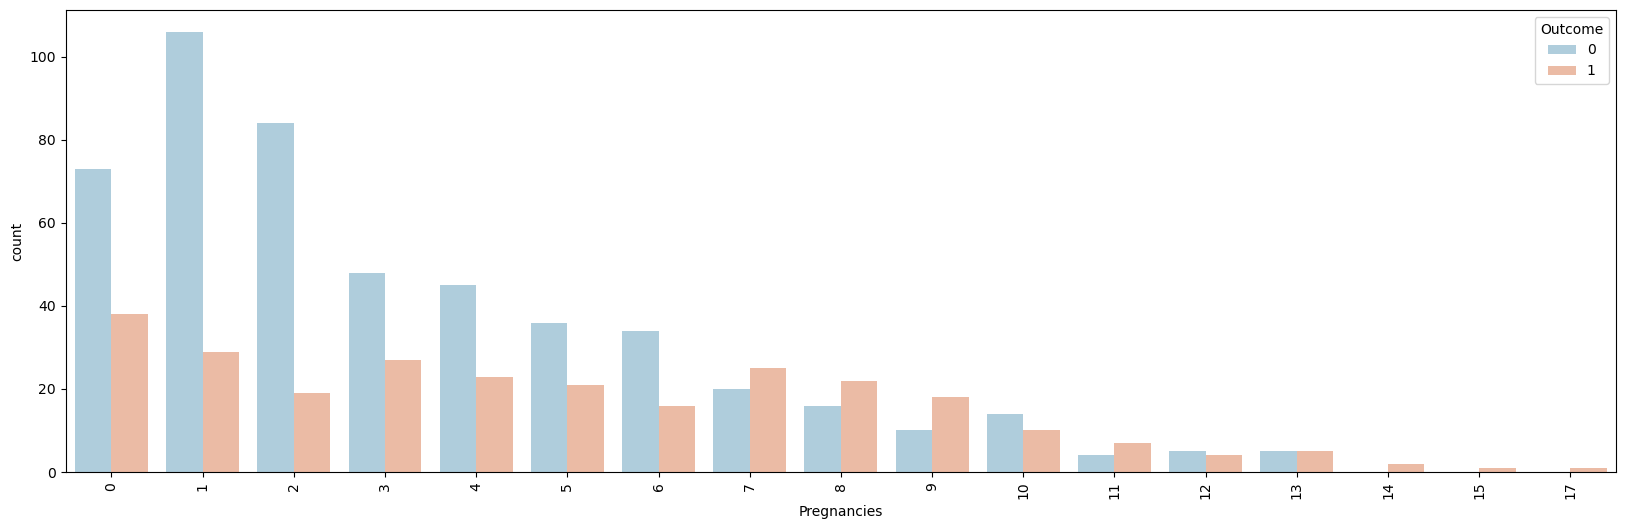

In [173]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x='Pregnancies',data=df,hue="Outcome",palette='RdBu_r', ax=ax)
plt.xticks(rotation=90)